<a class="anchor" id="1"></a>
# <p style="padding:10px;background-color:#61868c;margin:0;color:#ffffff;font-family:Arial, sans-serif;font-size:120%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Importing Libraries</p>

In [57]:
import cv2
import pickle
import numpy as np
import os

# Data Visualization
import matplotlib.pyplot as plt

<a class="anchor" id="2"></a>
# <p style="padding:10px;background-color:#61868c;margin:0;color:#ffffff;font-family:Arial, sans-serif;font-size:120%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Camera Setup and Background Initialization</p>

In [58]:
# Capture camera video frame (0- laptop camera | 1- external web camera)
video = cv2.VideoCapture(0)
facedetection = cv2.CascadeClassifier(
    r'data\haarcascade_frontalface_default.xml')

# Load two different background images
bg_name = cv2.imread("backgrounds/bg-enter_name.png")  # Background for name collection
bg_face = cv2.imread("backgrounds/bg-face_collection.png")  # Background for face collection

faces_list = []
i = 0

# Initialize the name input
name = ""
input_active = True

<a class="anchor" id="3"></a>
# <p style="padding:10px;background-color:#61868c;margin:0;color:#ffffff;font-family:Arial, sans-serif;font-size:120%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Name Collection</p>

In [59]:
# Start with name collection
while input_active:
    ret, frame = video.read()
    
    # Overlay the background for name collection
    frame_with_bg = bg_name.copy()

    # Display the name input prompt
    cv2.putText(frame_with_bg, name, (560, 350), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
    
    # Show the frame
    cv2.imshow("Face Collection", frame_with_bg)
    
    # Handle key presses to collect name and stop when 'Enter' is pressed
    key = cv2.waitKey(10) & 0xFF
    if key == 13 and name != "":  # Enter key to stop name input
        input_active = False
    elif key == 8 and len(name) > 0:  # Backspace key to remove the last character
        name = name[:-1]
    elif 32 <= key < 128:  # Add character to name if a printable key is pressed
        name += chr(key)

<a class="anchor" id="4"></a>
# <p style="padding:10px;background-color:#61868c;margin:0;color:#ffffff;font-family:Arial, sans-serif;font-size:120%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Face Collection</p>

In [60]:
# Face detection starts after the name is collected
faces_list = []
i = 0
while True:
    ret, frame = video.read()

    # Mirror the frame
    frame = cv2.flip(frame, 1)
    
    frame_with_bg = bg_face.copy()

    # Convert frame to greyscale for cascade classifier to work better
    grayscale = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = facedetection.detectMultiScale(grayscale, 1.3, 5)

    for (x, y, w, h) in faces:
        # Cropping the face frame
        crop_image = frame[y:y+h, x:x+w, :]
        resized_image = cv2.resize(crop_image, (50, 50))
        if len(faces_list) < 50 and i % 10 == 0:
            faces_list.append(resized_image)  # Add to faces list
        i += 1

        # Draw rectangle around detected face
        cv2.rectangle(frame, (x, y), (x + w, y + h), (203, 193, 37), 2)

        # Place text directly above the rectangle
        cv2.putText(
            frame, f"Collection: {len(faces_list)}", (x, y - 12), cv2.FONT_HERSHEY_SIMPLEX, 1, (203, 193, 37), 2)

    
    # Display the name inside the frame after collection
    cv2.putText(frame, f"Name: {name.capitalize()}", (35, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 0), 2)

    frame_with_bg[142:142 + 480, 78:78 + 640] = frame

    # Show the frame with background
    cv2.imshow("Face Collection", frame_with_bg)

    # Check if 50 faces are collected
    if len(faces_list) == 50:
        bg_collection_done = cv2.imread("backgrounds/bg-face_collection_done.png")
        # Display the new background
        cv2.imshow("Face Collection", bg_collection_done)
        cv2.waitKey(2000)
        break

    # Check for 'q' key press or stop when 50 faces are collected
    if cv2.waitKey(10) & 0xFF == ord('q') or len(faces_list) == 50:
        break

In [61]:
# Release the video and close all OpenCV windows
video.release()
cv2.destroyAllWindows()

<a class="anchor" id="5"></a>
# <p style="padding:10px;background-color:#61868c;margin:0;color:#ffffff;font-family:Arial, sans-serif;font-size:120%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Preparation and Reshaping</p>

In [62]:
# Convert data into a numpy array
faces_list = np.asarray(faces_list)
faces_list = faces_list.reshape(50, -1)  # Reshape for 50 faces - collection count

name = name.capitalize() 

<a class="anchor" id="6"></a>
# <p style="padding:10px;background-color:#61868c;margin:0;color:#ffffff;font-family:Arial, sans-serif;font-size:120%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Storing Captured Data in pkl File</p>

In [63]:
# Storing captured user names data into a .pkl file
# If 'names.pkl' is not available, create it in the 'data' folder
if 'names.pkl' not in os.listdir('data/'):
    names = [name] * 50  # Store the name 50 times for 50 faces
    with open('data/names.pkl', 'wb') as f:
        pickle.dump(names, f)
else: 
    with open('data/names.pkl', 'rb') as f:
        names = pickle.load(f)
    names = names + [name] * 50  # Concatenate new names for 50 faces
    # Save the updated list of names back to the file
    with open('data/names.pkl', 'wb') as f:
        pickle.dump(names, f)

# Storing captured user faces data into a .pkl file
# If 'faces_list.pkl' is not available, create it in the 'data' folder
if 'faces_list.pkl' not in os.listdir('data/'):
    with open('data/faces_list.pkl', 'wb') as f:
        pickle.dump(faces_list, f)
else: 
    with open('data/faces_list.pkl', 'rb') as f:
        faces = pickle.load(f)
    faces = np.append(faces, faces_list, axis=0)
    # Save the updated list of faces back to the file
    with open('data/faces_list.pkl', 'wb') as f:
        pickle.dump(faces, f)

<a class="anchor" id="6"></a>
# <p style="padding:10px;background-color:#61868c;margin:0;color:#ffffff;font-family:Arial, sans-serif;font-size:120%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Visualizing the Data Collected</p>

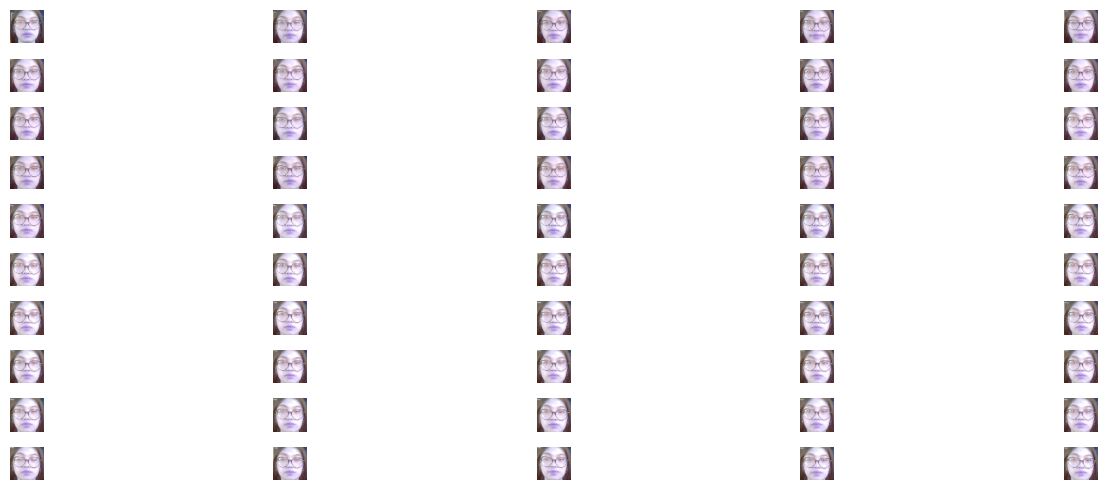

In [64]:
# Load the collected face data from the saved file
with open('data/faces_list.pkl', 'rb') as f:
    faces = pickle.load(f)

# Reshape the faces back to their original size (50x50) for visualization
faces_reshaped = faces.reshape(-1, 50, 50, 3)

# Display sample of the collected faces
def visualize_faces(faces, num_faces=10):
    """
    Visualizes a grid of sample faces from the dataset.
    """
    num_cols = 5
    num_rows = (num_faces // num_cols) + (num_faces % num_cols > 0)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))
    
    for i in range(num_faces):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col]
        ax.imshow(faces[i])  # Display the face
        ax.axis('off')
    
    # Hide empty subplots (if any)
    for j in range(num_faces, num_rows * num_cols):
        axes[j // num_cols, j % num_cols].axis('off')

    plt.tight_layout()
    plt.show()

# Call the function to visualize the first 50 faces
visualize_faces(faces_reshaped, num_faces=50)